In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [81]:
data = pd.read_csv("/kaggle/input/data-rumah/data_rumah.csv")
print(data)

   LuasBangunan  HargaRumah
0            50         500
1            60         550
2            70         610
3            80         680
4            90         720
5           100         790
6           110         850
7           120         900
8           130         950
9           140        1000


In [82]:
#ambil data dari csv
X = data["LuasBangunan"]
Y = data["HargaRumah"]

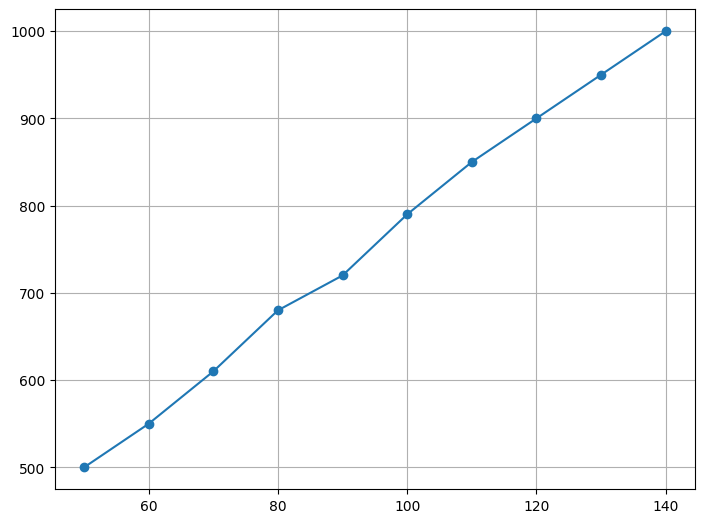

In [83]:
# visualisasi data dengan matplotlib
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(X,Y,marker="o")
ax.grid(True)
plt.show()

In [84]:
#variabel nilai regresi
DATA_TOTAL = len(data)
X_TOTAL = X.sum()
X_SQUARE = (X**2).sum()
X_AVERAGE = X.mean()
Y_TOTAL = Y.sum()
Y_AVERAGE = Y.mean()
XY = (X * Y).sum()

In [85]:
# hitung nilai persamaan variabel regresi
b = (((DATA_TOTAL*XY ) - (X_TOTAL * Y_TOTAL)) / ((DATA_TOTAL * X_SQUARE) - (X_TOTAL**2))).round(3)
a = (Y_AVERAGE - (b * X_AVERAGE)).round(3)
Y_AKSEN = (a + (b * X)).round(3)
Y_AASQUARE = ((Y - Y_AKSEN)**2).round(3)
Y_AASQUARE_TOTAL = Y_AASQUARE.sum().round(3)
TAKSIR_STANDAR = math.sqrt((Y_AASQUARE_TOTAL / (DATA_TOTAL - 2)))

In [112]:
#hitung interval nilai prediksi
prediksi = ((a + (b * X)).round(3)).to_list()
batas_bawah = ((a + (b * X) - TAKSIR_STANDAR).round(3)).to_list()
batas_atas = ((a + (b * X) + TAKSIR_STANDAR).round(3)).to_list()

#hitung satu titik x = 160
prediksi_x = ((a + (b * 160)).round(3))
batas_bawah_x = ((a + (b * 160) - TAKSIR_STANDAR))
batas_atas_x = ((a + (b * 160) + TAKSIR_STANDAR))

In [115]:
print(prediksi)
print(batas_bawah)
print(batas_atas)
print(prediksi_x)

[500.525, 557.075, 613.625, 670.175, 726.725, 783.275, 839.825, 896.375, 952.925, 1009.475]
[492.897, 549.447, 605.997, 662.547, 719.097, 775.647, 832.197, 888.747, 945.297, 1001.847]
[508.153, 564.703, 621.253, 677.803, 734.353, 790.903, 847.453, 904.003, 960.553, 1017.103]
1122.575


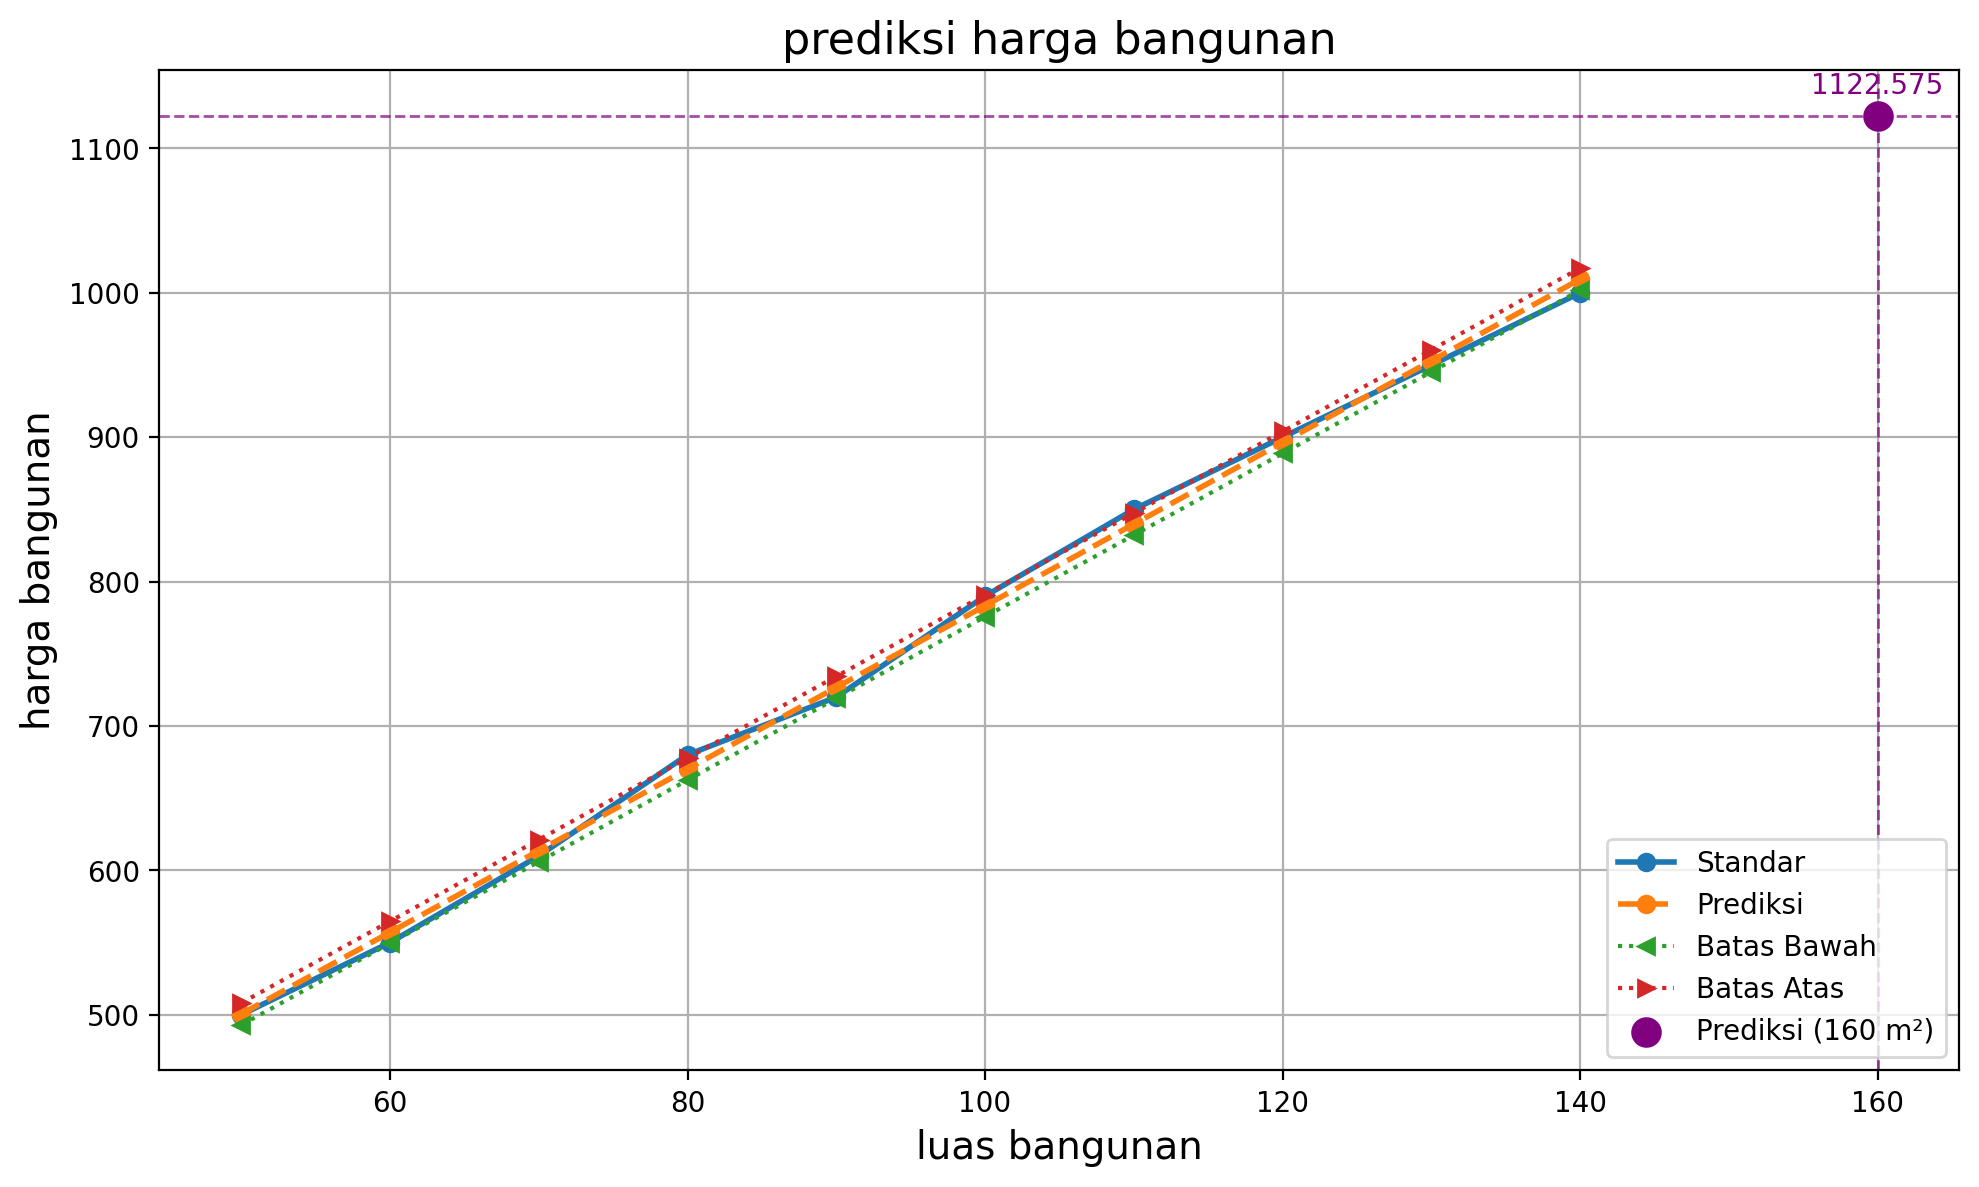

In [132]:
fig = plt.figure(figsize=(6,5),dpi=200)
ax = fig.add_axes([0,1,1.5,1])

ax.set_title("prediksi harga bangunan",fontsize=16)
ax.set_xlabel("luas bangunan",fontsize=14)
ax.set_ylabel("harga bangunan",fontsize=14)

ax.plot(X,Y,label="Standar",marker="o",ls="-", lw=2)
ax.plot(X,prediksi,label="Prediksi", marker="o",ls="--",lw=2)
ax.plot(X,batas_bawah,label="Batas Bawah", marker="<",ls=":")
ax.plot(X,batas_atas, label="Batas Atas", marker=">",ls=":")

plt.scatter(160, prediksi_x, color='purple', s=100, zorder=5, label="Prediksi (160 m²)")
plt.text(160, prediksi_x + 15, f"{prediksi_x:.3f}", ha='center', fontsize=10, color='purple')

# Garis bantu horizontal (ke sumbu Y)
plt.axhline(y=prediksi_x, color='purple', linestyle='--', linewidth=1, alpha=0.7)

# Garis bantu vertikal (ke sumbu X)
plt.axvline(x=160, color='purple', linestyle='--', linewidth=1, alpha=0.7)


ax.legend(loc="lower right")
ax.grid(True)
plt.show()

In [129]:
fig.savefig("grafik_prediksi.png", bbox_inches='tight')
fig.savefig("prediksi.png")